In [1]:
# Load the libraries
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import os

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 30, 20

In [3]:
path = 'binwalk-master'

In [4]:
files = []

In [5]:
# r = root, d = directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if('.py' in file and file != '__init__.py'):
            files.append(os.path.join(r, file))

In [6]:
def get_module_name(line):
    """Function takes a line and returns the name of module
    Parameters:
    line: str
    return: string
    """
    if("import" in line and "as" not in line and "from" not in line):
        return line.split()[1].lstrip().rstrip()
    elif("import" in line and "as" in line and "from" not in line):
        return line.split()[1].lstrip().rstrip()
    elif('from' in line and 'import' and "as" not in line):
        temp = line.split()
        print(temp)
        return str(temp[1].lstrip().rstrip()) + "." + str(temp[3].lstrip().rstrip())
    else:
        return "You dummy"

In [7]:
def stripping(content):
    for line in content:
        line = line.lstrip().rstrip()
        if("from" in line or "import" in line and '#' != line[0]):
            line = line.replace('\n', '')
            if(',' in line and 'import' in line and 'from' not in line):
                line = line.replace(',', ' ')
                temp = line.split()
                temp2 = temp[1:]
                for i in temp2:
                    i = i.lstrip().rstrip()
                    if(i != ''):
                        values.append(str(temp[0]) + " " + str(i))

            elif(',' in line and 'import' in line and 'from' in line and '#' != line[0]):
                temp = line.split(' import ')
                temp2 = ''.join(temp[1:]).split(',')
                for i in temp2:
                    values.append(str(temp[0]) + " import " + str(i.lstrip().rstrip()))
            else:
                values.append(line)

In [8]:
G = nx.Graph()

In [9]:
for filename in files:
    with open(filename) as f:
        content = f.readlines()
    
    values = []
    
    stripping(content)

    values_san = []
    for i in values:
        values_san.append(get_module_name(i))
        
    # add the head node which is the filename
    G.add_node(filename)
    
    # Eventually make a  list where I could have all the 
    default_moduels = []
    
    for i in values_san:
        if('.' not in i):
            G.add_edge(filename, i)
        else:
            temp = i.split('.')
            G.add_edge(filename, temp[0])
            j = 0
            while(j < len(temp)-1):
                G.add_edge(temp[j], temp[j+1])
                j += 1

['from', 'distutils.core', 'import', 'setup']
['from', 'distutils.core', 'import', 'Command']
['from', 'distutils.dir_util', 'import', 'remove_tree']
['from', 'subprocess', 'import', 'DEVNULL']
['#', 'from', 'git', 'in', 'the', '.gitignore', 'file.']
['from', 'nose.tools', 'import', 'eq_']
['from', 'nose.tools', 'import', 'ok_']
['from', 'nose.tools', 'import', 'eq_']
['from', 'nose.tools', 'import', 'ok_']
['from', 'nose.tools', 'import', 'eq_']
['from', 'nose.tools', 'import', 'ok_']
['from', 'nose.tools', 'import', 'eq_']
['from', 'nose.tools', 'import', 'ok_']
['from', 'nose.tools', 'import', 'eq_']
['from', 'nose.tools', 'import', 'ok_']
['from', 'nose.tools', 'import', 'eq_']
['from', 'nose.tools', 'import', 'ok_']
['from', 'nose.tools', 'import', 'eq_']
['from', 'nose.tools', 'import', 'ok_']
['from', 'binwalk.core.compat', 'import', '*']
['from', 'binwalk.core.compat', 'import', '*']
['from', 'binwalk.core.exceptions', 'import', 'IgnoreFileException']
['from', 'binwalk.core.com

IndexError: list index out of range

In [10]:
G.nodes()

NodeView(('binwalk-master/setup.py', 'os', 'sys', 'glob', 'shutil', 'subprocess', 'distutils', 'core', 'setup', 'Command', 'dir_util', 'remove_tree', 'DEVNULL', 'You dummy', 'binwalk', 'nose', 'from', 'in', 'binwalk-master/testing/test_generator.py', 'tools', 'eq_', 'ok_', 'binwalk-master/testing/tests/test_firmware_cpio.py', 'binwalk-master/testing/tests/test_firmware_zip.py', 'binwalk-master/testing/tests/test_firmware_squashfs.py', 'binwalk-master/testing/tests/test_firmware_jffs2.py', 'binwalk-master/testing/tests/test_firmware_gzip.py', 'binwalk-master/testing/tests/test_lzma.py', 'binwalk-master/src/binwalk/core/settings.py', 'common', 'compat', '*', 'binwalk-master/src/binwalk/core/plugin.py', 'imp', 'inspect', 'settings', 'exceptions', 'IgnoreFileException'))

In [11]:
G.edges()

EdgeView([('binwalk-master/setup.py', 'os'), ('binwalk-master/setup.py', 'sys'), ('binwalk-master/setup.py', 'glob'), ('binwalk-master/setup.py', 'shutil'), ('binwalk-master/setup.py', 'subprocess'), ('binwalk-master/setup.py', 'distutils'), ('binwalk-master/setup.py', 'You dummy'), ('binwalk-master/setup.py', 'binwalk'), ('binwalk-master/setup.py', 'nose'), ('binwalk-master/setup.py', 'from'), ('os', 'binwalk-master/testing/test_generator.py'), ('os', 'binwalk-master/testing/tests/test_firmware_cpio.py'), ('os', 'binwalk-master/testing/tests/test_firmware_zip.py'), ('os', 'binwalk-master/testing/tests/test_firmware_squashfs.py'), ('os', 'binwalk-master/testing/tests/test_firmware_jffs2.py'), ('os', 'binwalk-master/testing/tests/test_firmware_gzip.py'), ('os', 'binwalk-master/testing/tests/test_lzma.py'), ('os', 'binwalk-master/src/binwalk/core/settings.py'), ('os', 'binwalk-master/src/binwalk/core/plugin.py'), ('sys', 'binwalk-master/testing/test_generator.py'), ('subprocess', 'DEVNUL

/home/data/anaconda3/envs/DataSci/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


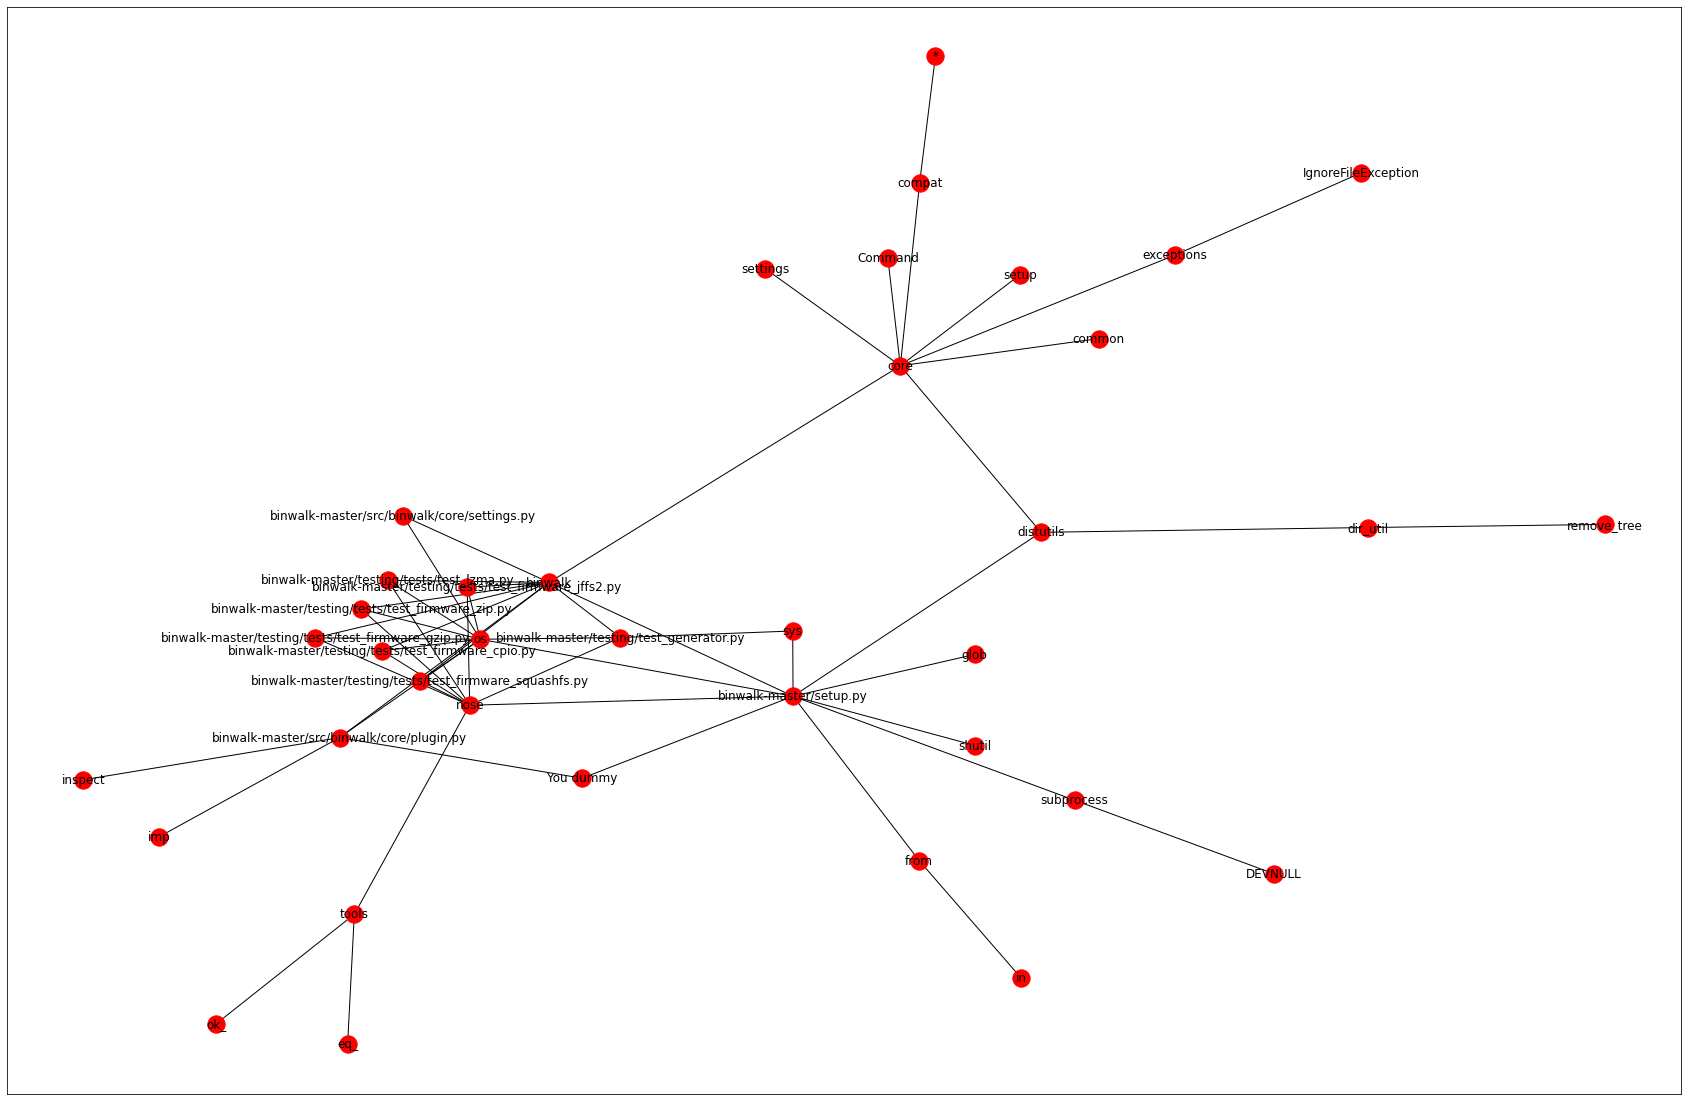

In [12]:
nx.draw_networkx(G, with_labels=True, node_color='r', font_color='k');